# DATA

## Data Collection

In [ ]:
# Original code to concatenate all the csv files together
# For reference only. Do not run this code as the data was already concatenated into one csv file for simplicity

import pandas as pd
import glob # used to retrieve files and pathnames matching a specified pattern.

folder_path = '/content/drive/MyDrive/Colab Notebooks/sosc314/Final Project/TelevisionNews/'

# Use glob to get a list of all CSV files in the folder
file_list = glob.glob(folder_path + '*.csv')

# Check if there are any CSV files
if not file_list:
    print("No CSV files found in the specified folder.")
else:
    # Initialize an empty list to store DataFrames
    dfs = []

    # Iterate through the list of files and read each CSV
    for file in file_list:
        try:
            df = pd.read_csv(file)
            # Check if the DataFrame is not empty before appending
            if not df.empty:
                dfs.append(df)
        except pd.errors.EmptyDataError:
            print(f"Skipped empty file: {file}")

    else:
        # Concatenate all DataFrames in the list vertically
        combined_df = pd.concat(dfs, ignore_index=True)

During this process, some empty files were detected and deleted from the folder so the code could iterate through all of the files to create the "combined_df"

In [2]:
# Download the concatenated dataset
!pip install gdown==4.6.3
!gdown https://drive.google.com/uc?id=1RdmbetXzfaONw0KfTawxCij9w6Fkk6B-

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1RdmbetXzfaONw0KfTawxCij9w6Fkk6B-
To: /content/combined_data.csv
100% 56.1M/56.1M [00:03<00:00, 18.1MB/s]


In [3]:
# Read and visualize dataset
import pandas as pd
df = pd.read_csv('combined_data.csv')
df

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/BBCNEWS_20170131_0...,1/31/2017 5:53:28,BBCNEWS,BBC News,BBCNEWS_20170131_054500_BBC_News,https://archive.org/download/BBCNEWS_20170131_...,beena part to do. the airline industry has not...
1,https://archive.org/details/BBCNEWS_20170118_1...,1/18/2017 19:21:01,BBCNEWS,BBC News,BBCNEWS_20170118_190000_BBC_News,https://archive.org/download/BBCNEWS_20170118_...,"it's beaten it by about 0.1, 0.12 degrees cels..."
2,https://archive.org/details/BBCNEWS_20170105_2...,1/5/2017 21:48:46,BBCNEWS,Outside Source,BBCNEWS_20170105_213000_Outside_Source,https://archive.org/download/BBCNEWS_20170105_...,"contact more than expected, how. your co nta c..."
3,https://archive.org/details/BBCNEWS_20170105_2...,1/5/2017 21:13:33,BBCNEWS,Outside Source,BBCNEWS_20170105_210000_Outside_Source,https://archive.org/download/BBCNEWS_20170105_...,"where every time a marketplace is closed down,..."
4,https://archive.org/details/BBCNEWS_20170111_0...,1/11/2017 3:11:51,BBCNEWS,BBC News,BBCNEWS_20170111_030000_BBC_News,https://archive.org/download/BBCNEWS_20170111_...,"applause climate change, a controversial issue..."
...,...,...,...,...,...,...,...
94853,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:41:59,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,https://archive.org/download/MSNBCW_20151017_0...,"climate coalition, which sounds very green, bu..."
94854,https://archive.org/details/MSNBCW_20151012_06...,10/12/2015 6:54:46,MSNBC,Meet the Press,MSNBCW_20151012_060000_Meet_the_Press,https://archive.org/download/MSNBCW_20151012_0...,will you definitively rule out running for pre...
94855,https://archive.org/details/MSNBCW_20151006_21...,10/6/2015 21:51:41,MSNBC,MTP Daily,MSNBCW_20151006_210000_MTP_Daily,https://archive.org/download/MSNBCW_20151006_2...,"social security, dealing with a living wage as..."
94856,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:13:39,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,https://archive.org/download/MSNBCW_20151017_0...,for years exxon was a loud voice in denying th...


## Data Cleaning

After deciding to remove BBC News from the analysis, because the dataset was already concatenated, remove all these rows.

In [4]:
# Delete rows where the station is BBC News
env_news_df = df.drop(df[df['Station'] == 'BBCNEWS'].index)

# Lowercase column names and reset their index
env_news_df.columns = df.columns.str.lower()
env_news_df.reset_index()

,index,url,matchdatetime,station,show,iashowid,iapreviewthumb,snippet
0,501,https://archive.org/details/CNNW_20150918_0400...,9/18/2015 4:05:07,CNN,Anderson Cooper 360,CNNW_20150918_040000_Anderson_Cooper_360,https://archive.org/download/CNNW_20150918_040...,that's before hewlett-packard. how many people...
1,502,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:53,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,https://archive.org/download/CNNW_20150918_000...,who believes in global warming?
2,503,https://archive.org/details/CNNW_20150925_0200...,9/25/2015 2:37:17,CNN,CNN Tonight With Don Lemon,CNNW_20150925_020000_CNN_Tonight_With_Don_Lemon,https://archive.org/download/CNNW_20150925_020...,with what he is saying or what's in the bible?...
3,504,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:52,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,https://archive.org/download/CNNW_20150918_000...,for 37 yea years. lusent. headed by who? carly...
4,505,https://archive.org/details/CNNW_20150924_0100...,9/24/2015 1:02:24,CNN,Anderson Cooper 360,CNNW_20150924_010000_Anderson_Cooper_360,https://archive.org/download/CNNW_20150924_010...,"family, i'm happy to be a guest a in country. ..."
...,...,...,...,...,...,...,...,...
71593,94853,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:41:59,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,https://archive.org/download/MSNBCW_20151017_0...,"climate coalition, which sounds very green, bu..."
71594,94854,https://archive.org/details/MSNBCW_20151012_06...,10/12/2015 6:54:46,MSNBC,Meet the Press,MSNBCW_20151012_060000_Meet_the_Press,https://archive.org/download/MSNBCW_20151012_0...,will you definitively rule out running for pre...
71595,94855,https://archive.org/details/MSNBCW_20151006_21...,10/6/2015 21:51:41,MSNBC,MTP Daily,MSNBCW_20151006_210000_MTP_Daily,https://archive.org/download/MSNBCW_20151006_2...,"social security, dealing with a living wage as..."
71596,94856,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:13:39,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,https://archive.org/download/MSNBCW_20151017_0...,for years exxon was a loud voice in denying th...


In [5]:
# Remove unnecessary column to save memory
env_news_df.drop(columns=["iapreviewthumb"], inplace=True)
env_news_df

,url,matchdatetime,station,show,iashowid,snippet
501,https://archive.org/details/CNNW_20150918_0400...,9/18/2015 4:05:07,CNN,Anderson Cooper 360,CNNW_20150918_040000_Anderson_Cooper_360,that's before hewlett-packard. how many people...
502,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:53,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,who believes in global warming?
503,https://archive.org/details/CNNW_20150925_0200...,9/25/2015 2:37:17,CNN,CNN Tonight With Don Lemon,CNNW_20150925_020000_CNN_Tonight_With_Don_Lemon,with what he is saying or what's in the bible?...
504,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:52,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,for 37 yea years. lusent. headed by who? carly...
505,https://archive.org/details/CNNW_20150924_0100...,9/24/2015 1:02:24,CNN,Anderson Cooper 360,CNNW_20150924_010000_Anderson_Cooper_360,"family, i'm happy to be a guest a in country. ..."
...,...,...,...,...,...,...
94853,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:41:59,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,"climate coalition, which sounds very green, bu..."
94854,https://archive.org/details/MSNBCW_20151012_06...,10/12/2015 6:54:46,MSNBC,Meet the Press,MSNBCW_20151012_060000_Meet_the_Press,will you definitively rule out running for pre...
94855,https://archive.org/details/MSNBCW_20151006_21...,10/6/2015 21:51:41,MSNBC,MTP Daily,MSNBCW_20151006_210000_MTP_Daily,"social security, dealing with a living wage as..."
94856,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:13:39,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,for years exxon was a loud voice in denying th...


In [ ]:
import pandas as pd

# Clean "matchdatetime" column for better analysis of data distribution
data = env_news_df[{'matchdatetime'}]
df_time = pd.DataFrame(data)

# Define regex pattern to extract date and time components
pattern = r'(\d{1,2})/(\d{1,2})/(\d{4}) (\d{1,2}:\d{2}:\d{2})'

# Extract date and time components into separate columns
df_time[['month', 'day', 'year', 'time']] = df_time['matchdatetime'].str.extract(pattern)

# Convert 'month', 'day', and 'year' columns to integers
df_time[['month', 'day', 'year']] = df_time[['month', 'day', 'year']].astype(int)

# Display the DataFrame with new columns
df_time

<ipython-input-9-62fc3749e617>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = env_news_df[{'matchdatetime'}]


,matchdatetime,month,day,year,time
501,9/18/2015 4:05:07,9,18,2015,4:05:07
502,9/18/2015 0:04:53,9,18,2015,0:04:53
503,9/25/2015 2:37:17,9,25,2015,2:37:17
504,9/18/2015 0:04:52,9,18,2015,0:04:52
505,9/24/2015 1:02:24,9,24,2015,1:02:24
...,...,...,...,...,...
94853,10/17/2015 0:41:59,10,17,2015,0:41:59
94854,10/12/2015 6:54:46,10,12,2015,6:54:46
94855,10/6/2015 21:51:41,10,6,2015,21:51:41
94856,10/17/2015 0:13:39,10,17,2015,0:13:39


In [ ]:
# Merging env_news_df and df thorugh common column "matchdatetime"
df = env_news_df.merge(df_time, on='matchdatetime')
df

,url,matchdatetime,station,show,iashowid,snippet,month,day,year,time
0,https://archive.org/details/CNNW_20150918_0400...,9/18/2015 4:05:07,CNN,Anderson Cooper 360,CNNW_20150918_040000_Anderson_Cooper_360,that's before hewlett-packard. how many people...,9,18,2015,4:05:07
1,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:53,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,who believes in global warming?,9,18,2015,0:04:53
2,https://archive.org/details/CNNW_20150925_0200...,9/25/2015 2:37:17,CNN,CNN Tonight With Don Lemon,CNNW_20150925_020000_CNN_Tonight_With_Don_Lemon,with what he is saying or what's in the bible?...,9,25,2015,2:37:17
3,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:52,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,for 37 yea years. lusent. headed by who? carly...,9,18,2015,0:04:52
4,https://archive.org/details/CNNW_20150924_0100...,9/24/2015 1:02:24,CNN,Anderson Cooper 360,CNNW_20150924_010000_Anderson_Cooper_360,"family, i'm happy to be a guest a in country. ...",9,24,2015,1:02:24
...,...,...,...,...,...,...,...,...,...,...
71979,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:41:59,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,"climate coalition, which sounds very green, bu...",10,17,2015,0:41:59
71980,https://archive.org/details/MSNBCW_20151012_06...,10/12/2015 6:54:46,MSNBC,Meet the Press,MSNBCW_20151012_060000_Meet_the_Press,will you definitively rule out running for pre...,10,12,2015,6:54:46
71981,https://archive.org/details/MSNBCW_20151006_21...,10/6/2015 21:51:41,MSNBC,MTP Daily,MSNBCW_20151006_210000_MTP_Daily,"social security, dealing with a living wage as...",10,6,2015,21:51:41
71982,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:13:39,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,for years exxon was a loud voice in denying th...,10,17,2015,0:13:39


## Summary Statistics

### Visualizations on the counts of shows and stations

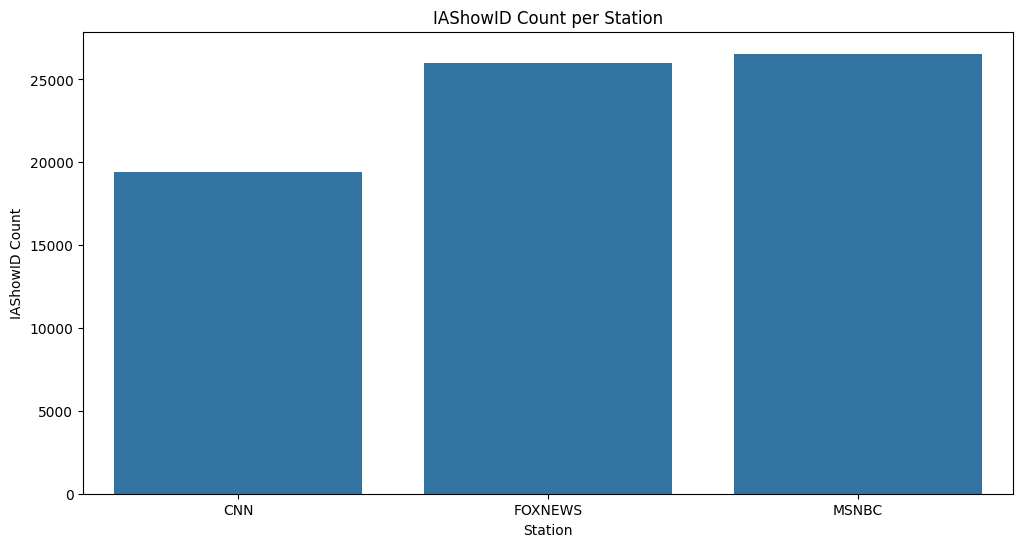

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Graph the number of text instances per station to see the distribution of stations

# Use iashowid becuase it represents all the shows in the dataset with their unique id
station_counts = df.groupby('station')['iashowid'].count()

# Seaborn Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.index, y=station_counts.values)
plt.xlabel('Station')
plt.ylabel('IAShowID Count')
plt.title('IAShowID Count per Station')
plt.xticks()
plt.savefig("Summary_CountperStation")

In [ ]:
# Same as graph above but in tabular form

value_counts_station = df['station'].value_counts().reset_index()
value_counts_station

,index,station
0,MSNBC,26549
1,FOXNEWS,26016
2,CNN,19419


### Time visualizations

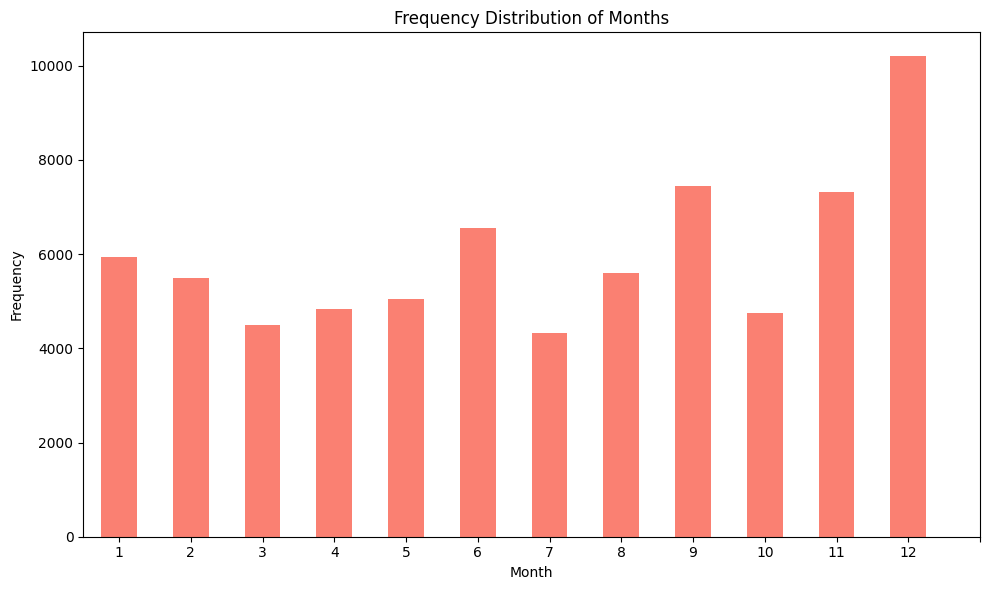

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Look at the distributions of shows per month

month_freq = df['month'].value_counts().sort_index()

# Bar chart for each month
plt.figure(figsize=(10, 6))
month_freq.plot(kind='bar', color='salmon')
plt.title('Frequency Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(0, 13), rotation = 0)
plt.tight_layout()
plt.savefig("FrequencyDistributionMonths")

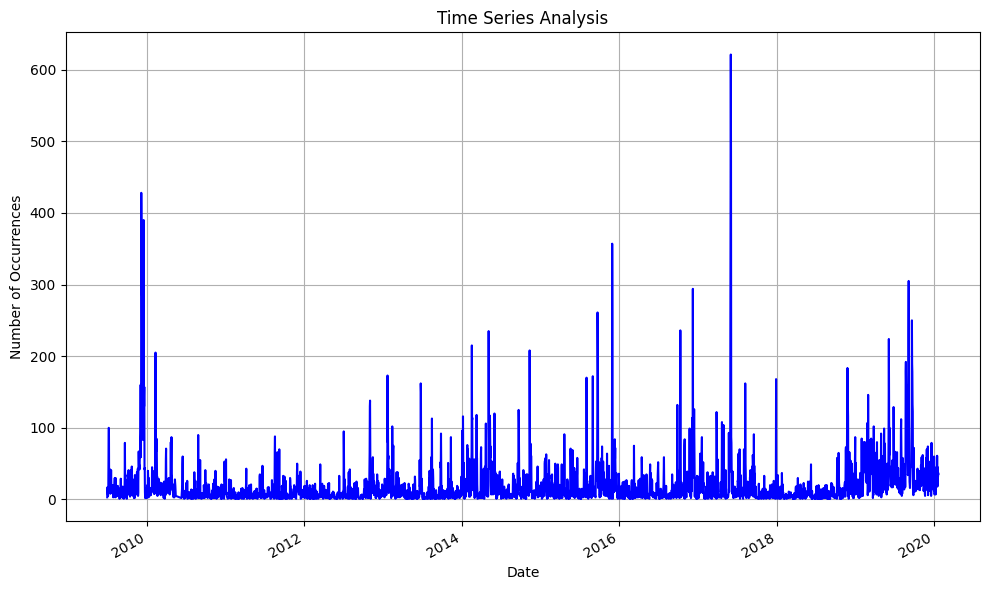

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine year, month, and day columns into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Group by date and count occurrences
time_series_data = df.groupby('date').size()

# Plot time series
plt.figure(figsize=(10, 6))
time_series_data.plot(color='blue')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.tight_layout()
plt.savefig("appendix_overrall_timeseries")

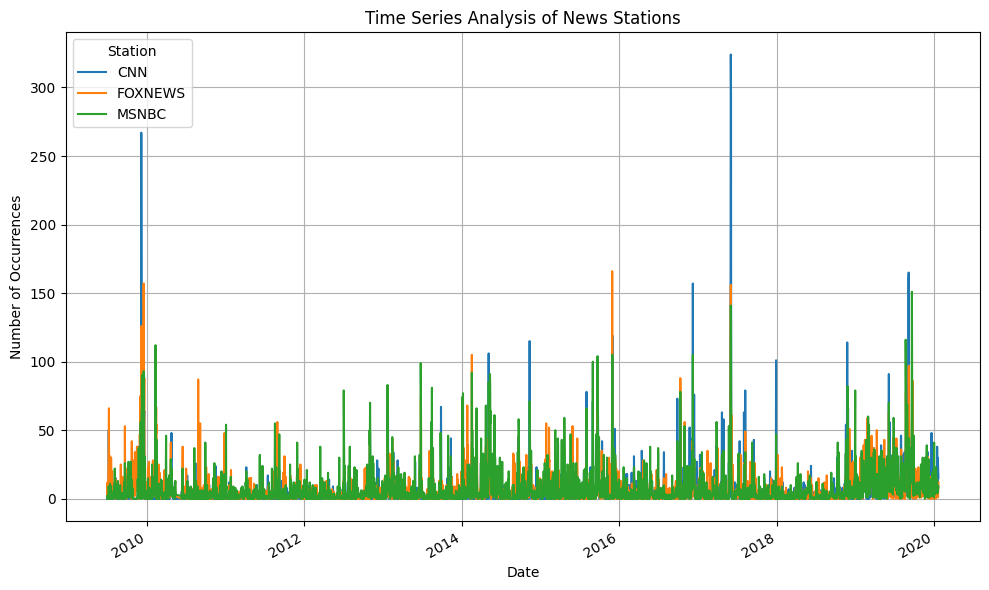

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the same as before but distinguishing stations to analyze why the increases at specific periods of time occur

# Calculate frequency of each station
station_freq = df['station'].value_counts()

# Filter the DataFrame to include only the rows corresponding to the 3 stations
df_top_stations = df[df['station'].isin(station_freq.index)]

# Combine 'year', 'month', and 'day' columns into a single datetime column
df_top_stations['date'] = pd.to_datetime(df_top_stations[['year', 'month', 'day']])

# Group by date and station, then count occurrences
time_series_data_top_stations = df_top_stations.groupby(['date', 'station']).size().unstack().fillna(0)

# Plot time series for stations
plt.figure(figsize=(10, 6))
time_series_data_top_stations.plot(ax=plt.gca())
plt.title('Time Series Analysis of News Stations')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend(title='Station', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("TimeSeriesAnalysis")

## Preprocessing Data

In [ ]:
import pandas as pd
import string
import spacy

# Lemmatization, removing punctuation, special characters, and numbers

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Function to perform lemmatization and remove numbers and special characters
def preprocess_text(text):
    # Lemmatize the text
    doc = nlp(text)
    lemma_text = ' '.join([token.lemma_ for token in doc])
    # Remove numbers and special characters
    clean_text = ''.join([char for char in lemma_text if char not in string.punctuation and not char.isdigit()])

    return clean_text

# Apply preprocessing function to the 'snippet' column
df['clean_snippet'] = df['snippet'].apply(preprocess_text)

# Save the DataFrame with cleaned snippets to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


As the lemmatization takes a long time, the cleaned csv file was saved and can be downloaded below

In [9]:
# Download the cleaned/preprocessed dataset
!gdown https://drive.google.com/uc?id=1f1Xj97sRfZpgJObYi7GUhr8ZDRhJcgSm

Downloading...
From: https://drive.google.com/uc?id=1f1Xj97sRfZpgJObYi7GUhr8ZDRhJcgSm
To: /content/cleaned_data.csv
100% 46.6M/46.6M [00:00<00:00, 219MB/s]


In [10]:
import pandas as pd
cleaned_df = pd.read_csv("cleaned_data.csv")
cleaned_df

,url,matchdatetime,station,show,iashowid,snippet,month,day,year,time,clean_snippet
0,https://archive.org/details/CNNW_20150918_0400...,9/18/2015 4:05:07,CNN,Anderson Cooper 360,CNNW_20150918_040000_Anderson_Cooper_360,thats before hewlettpackard how many people he...,9,18,2015,4:05:07,that s before hewlettpackard how many people h...
1,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:53,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,who believes in global warming,9,18,2015,0:04:53,who believe in global warming
2,https://archive.org/details/CNNW_20150925_0200...,9/25/2015 2:37:17,CNN,CNN Tonight With Don Lemon,CNNW_20150925_020000_CNN_Tonight_With_Don_Lemon,with what he is saying or whats in the bible t...,9,25,2015,2:37:17,with what he be say or what s in the bible the...
3,https://archive.org/details/CNNW_20150918_0000...,9/18/2015 0:04:52,CNN,Anderson Cooper 360,CNNW_20150918_000000_Anderson_Cooper_360,for 37 yea years lusent headed by who carly th...,9,18,2015,0:04:52,for yea year lusent head by who carly that be...
4,https://archive.org/details/CNNW_20150924_0100...,9/24/2015 1:02:24,CNN,Anderson Cooper 360,CNNW_20150924_010000_Anderson_Cooper_360,family im happy to be a guest a in country and...,9,24,2015,1:02:24,family i m happy to be a guest a in country an...
...,...,...,...,...,...,...,...,...,...,...,...
71979,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:41:59,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,climate coalition which sounds very green but ...,10,17,2015,0:41:59,climate coalition which sound very green but i...
71980,https://archive.org/details/MSNBCW_20151012_06...,10/12/2015 6:54:46,MSNBC,Meet the Press,MSNBCW_20151012_060000_Meet_the_Press,will you definitively rule out running for pre...,10,12,2015,6:54:46,will you definitively rule out run for preside...
71981,https://archive.org/details/MSNBCW_20151006_21...,10/6/2015 21:51:41,MSNBC,MTP Daily,MSNBCW_20151006_210000_MTP_Daily,social security dealing with a living wage as ...,10,6,2015,21:51:41,social security deal with a living wage as the...
71982,https://archive.org/details/MSNBCW_20151017_00...,10/17/2015 0:13:39,MSNBC,All In With Chris Hayes,MSNBCW_20151017_000000_All_In_With_Chris_Hayes,for years exxon was a loud voice in denying th...,10,17,2015,0:13:39,for year exxon be a loud voice in deny the exi...


### Snippet or text visualization

Calculating the most common words throughout the dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1000x600 with 0 Axes>

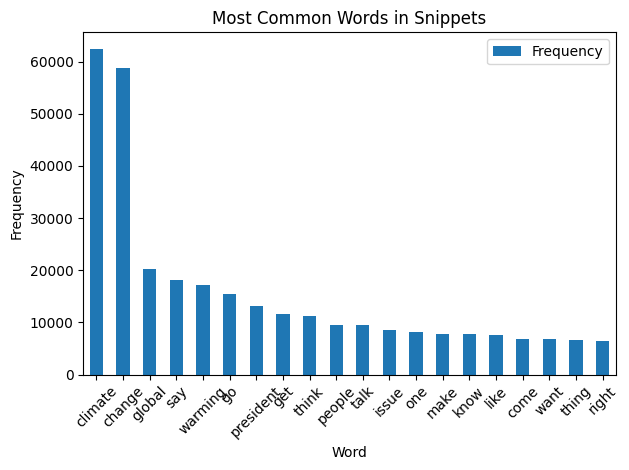

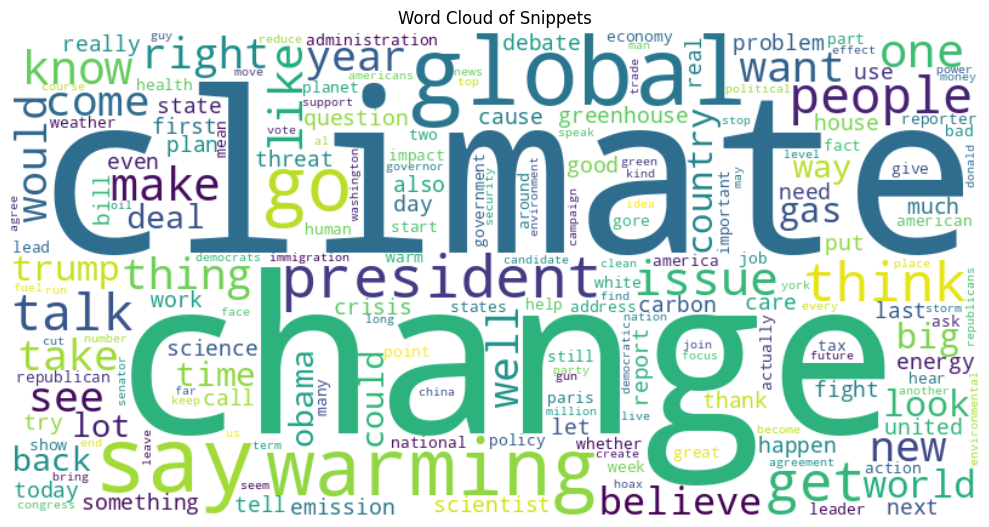

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')


# Combine all snippets into a single text
all_snippets = ' '.join(cleaned_df['clean_snippet'])

# Tokenize the text into words
tokens = word_tokenize(all_snippets) # Use NLTK's tokenizer to be able to view the word in the graph and the word cloud

# Remove punctuation
tokens_no_punct = [word for word in tokens if word.lower() not in string.punctuation]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens_no_punct if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = Counter(filtered_tokens)

# Plot the most common words as a bar chart
plt.figure(figsize=(10, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
word_freq_df.plot(kind='bar', x='Word', y='Frequency')
plt.title('Most Common Words in Snippets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Snippets')
plt.axis('off')
plt.tight_layout()
plt.savefig("wordcloud")


Calculating the most common words per station

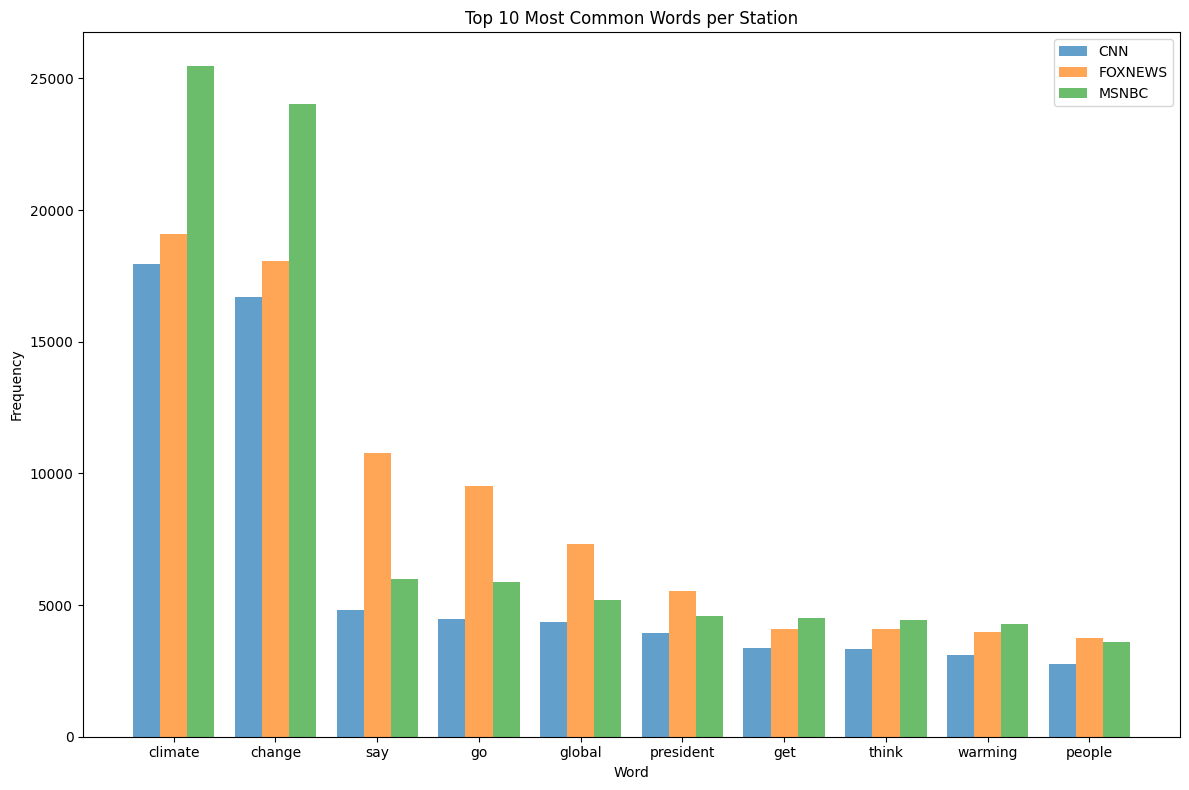

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import numpy as np

# Combine snippets by station
station_snippets = cleaned_df.groupby('station')['clean_snippet'].apply(lambda x: ' '.join(x))

# Initialize an empty dictionary to store word frequencies per station
station_word_freq = {}

# Tokenize and process snippets for each station
for station, snippets in station_snippets.items():
    # Tokenize the snippets into words
    tokens = word_tokenize(snippets)

    # Remove punctuation
    tokens_no_punct = [word for word in tokens if word.lower() not in string.punctuation]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens_no_punct if word.lower() not in stop_words]

    # Calculate word frequencies
    word_freq = Counter(filtered_tokens)

    # Store word frequencies for the station
    station_word_freq[station] = word_freq

# Plot the most common words for each station
plt.figure(figsize=(12, 8))

# Determine the width of each bar
bar_width = 0.8 / len(station_word_freq)

# Initialize position counter for bars
position = np.arange(10)

# Iterate over stations and plot the most common words
for i, (station, word_freq) in enumerate(station_word_freq.items()):
    common_words_df = pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency'])
    plt.bar(position + i * bar_width, common_words_df['Frequency'], bar_width, alpha=0.7, label=station)

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words per Station')
plt.xticks(position + (len(station_word_freq) - 1) * bar_width / 2, common_words_df['Word'])
plt.legend()
plt.tight_layout()
plt.savefig("distribution_stations_common_words")

# METHODS & RESULTS

In [11]:
# Retrieve the Fighting Words package from jmhessel's github
!git clone https://github.com/jmhessel/FightingWords.git

Cloning into 'FightingWords'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 25
Receiving objects: 100% (26/26), 6.41 KiB | 6.41 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
from FightingWords import fighting_words_py3

**CNN vs. Fox News**

In [ ]:
# Select and separate the appropiate snippets per station
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"]
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]

In [ ]:
# Run the fighting words function with cnn_texts and fox_texts
fw = fighting_words_py3.bayes_compare_language(cnn_texts, fox_texts) #positive ones are the ones you put in first

Vocab size is 5470
Comparing language...


In [ ]:
# Present the resulting table showing the top scored words and their z-score
df_scores = pd.DataFrame(fw, columns = ['word', 'z-score'])
df_scores

,word,z-score
0,warming,-37.590180
1,global,-34.849014
2,they,-24.094931
3,bill,-21.045306
4,not,-16.107475
...,...,...
5465,cnn,17.189951
5466,president,17.527580
5467,talk,18.772904
5468,reporter,20.460012


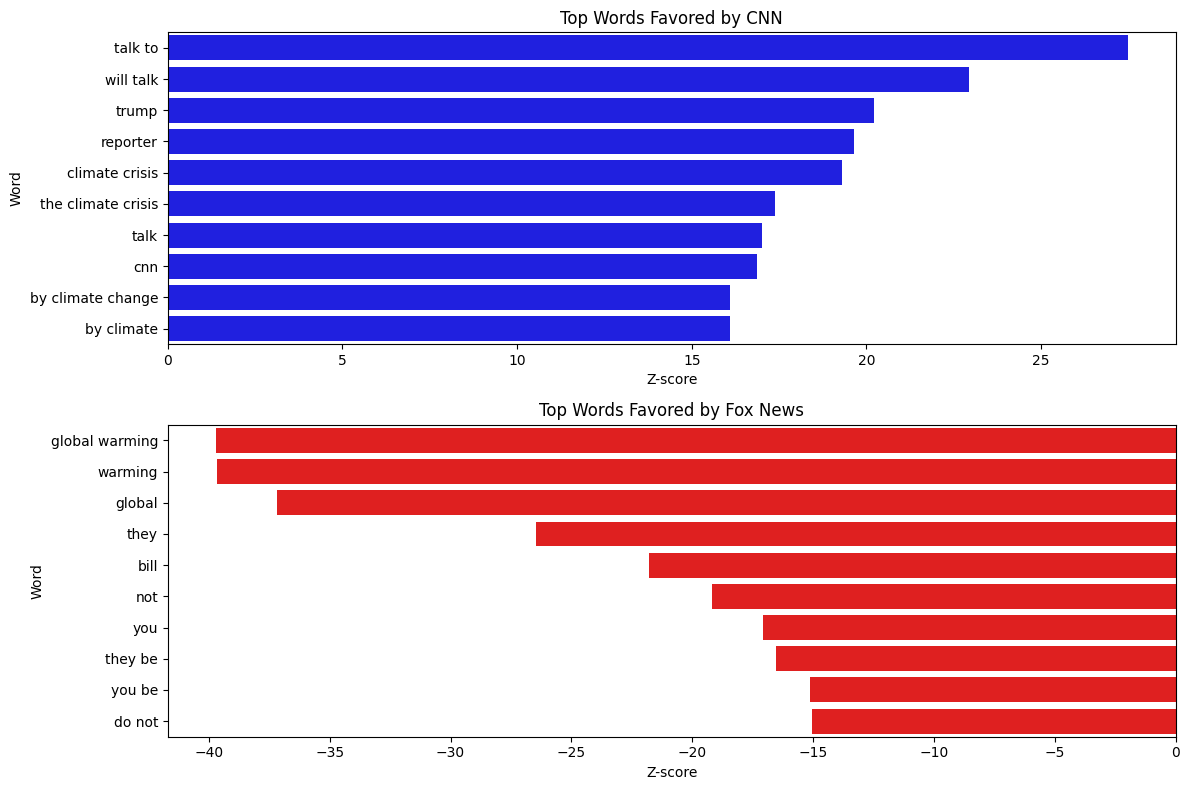

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 words from the table above in a bar graph

# Filter the table as the positive and negative z-scores refer to a different station
positive_words = [word for word, z_score in fw if z_score > 0]  # Words favoring CNN
negative_words = [word for word, z_score in fw if z_score < 0]  # Words favoring Fox News

# Extract the top 10 words with highest z-scores for CNN
top_n = 10
top_positive_words = sorted(fw, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for Fox News
top_negative_words = sorted(fw, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by CNN')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by Fox News')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_wrds_cnn_fox")

In [ ]:
# Repeat the same code now specifing the parameter ngram=2 to do bigrams

fw_ngram = fighting_words_py3.bayes_compare_language(cnn_texts, fox_texts, ngram=2) #positive ones are the ones you put in first
df_scores_ngram = pd.DataFrame(fw_ngram, columns = ['word', 'z-score'])
df_scores_ngram

Vocab size is 15000
Comparing language...


,word,z-score
0,global warming,-38.818525
1,warming,-38.759665
2,global,-36.153103
3,they,-25.447342
4,bill,-21.473513
...,...,...
14995,climate crisis,19.539856
14996,reporter,19.985231
14997,trump,20.735167
14998,will talk,23.079224


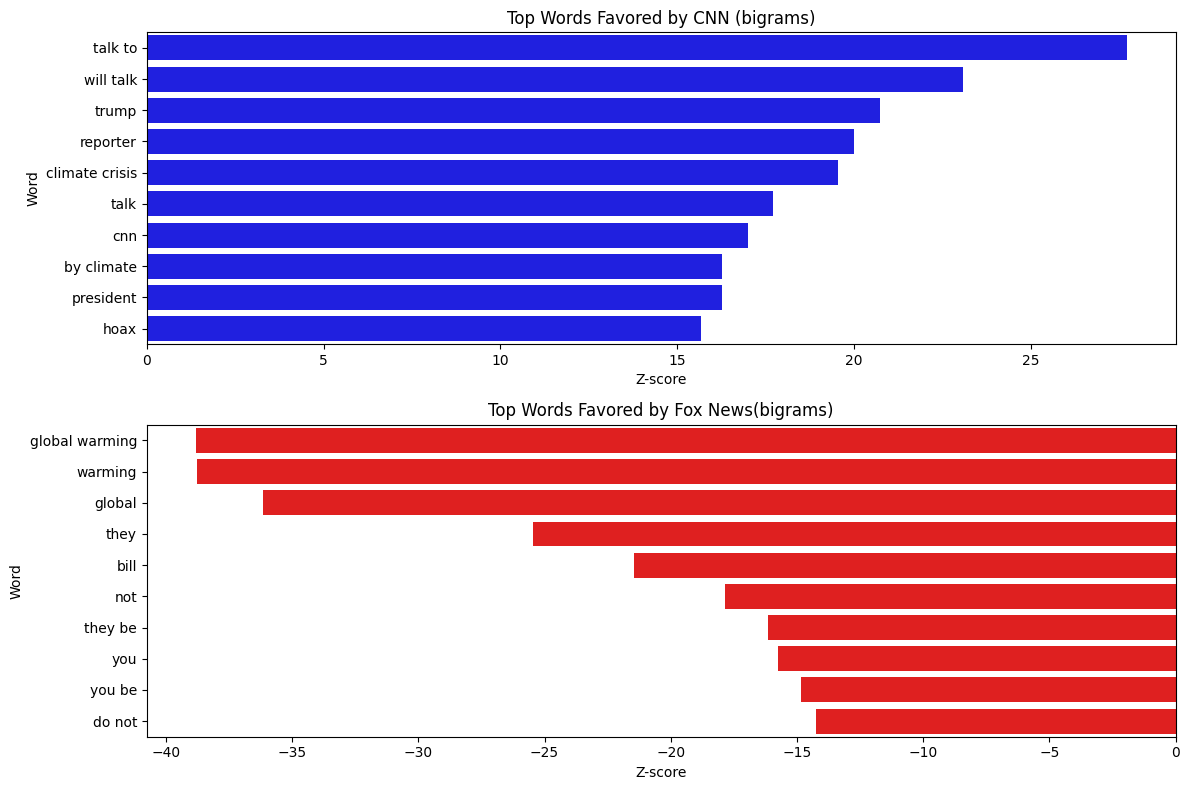

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Again repeat the same code now with bigrams

positive_words = [word for word, z_score in fw_ngram if z_score > 0]  # Words favoring CNN
negative_words = [word for word, z_score in fw_ngram if z_score < 0]  # Words favoring Fox News

# Extract the top 10 words with highest z-scores for CNN
top_n = 10
top_positive_words = sorted(fw_ngram, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for Fox News
top_negative_words = sorted(fw_ngram, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by CNN (bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by Fox News(bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_bigrams_cnn_fox")

To visualize the data in scatter plots as Monroe et al visualize in their article, I initially tried to plot the above table but was unsucessful. After more research, I found another researcher that had uploaded her code to GitHub also inspired in Monroe et al specifically to obtain similar graphs.

In [ ]:
# Download the code from github
!git clone https://gist.github.com/3c4070b2f232b185ce6a09e47b4e7473.git

Cloning into '3c4070b2f232b185ce6a09e47b4e7473'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# change the current directory
cd 3c4070b2f232b185ce6a09e47b4e7473

/content/3c4070b2f232b185ce6a09e47b4e7473


In [ ]:
from fightinwords import bayes_compare_language
import pandas as pd
# Repear similar steps as before but with the new function required
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"]
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]
fw = bayes_compare_language(l1=cnn_texts, l2=fox_texts, ngram=1, prior=.01, cv=None, sig_val=2.573) # sig_val refers to those gray points in the graph

# This will generate the plot and save it as 'test.pdf'

Vocab size is 5470
Comparing language...


The code obtain from GitHub will generate the desired plot and save it into a pdf. Below is an image of the plot generated by this code. As there are some clear readability issues, the code will be modified to fit this research better.

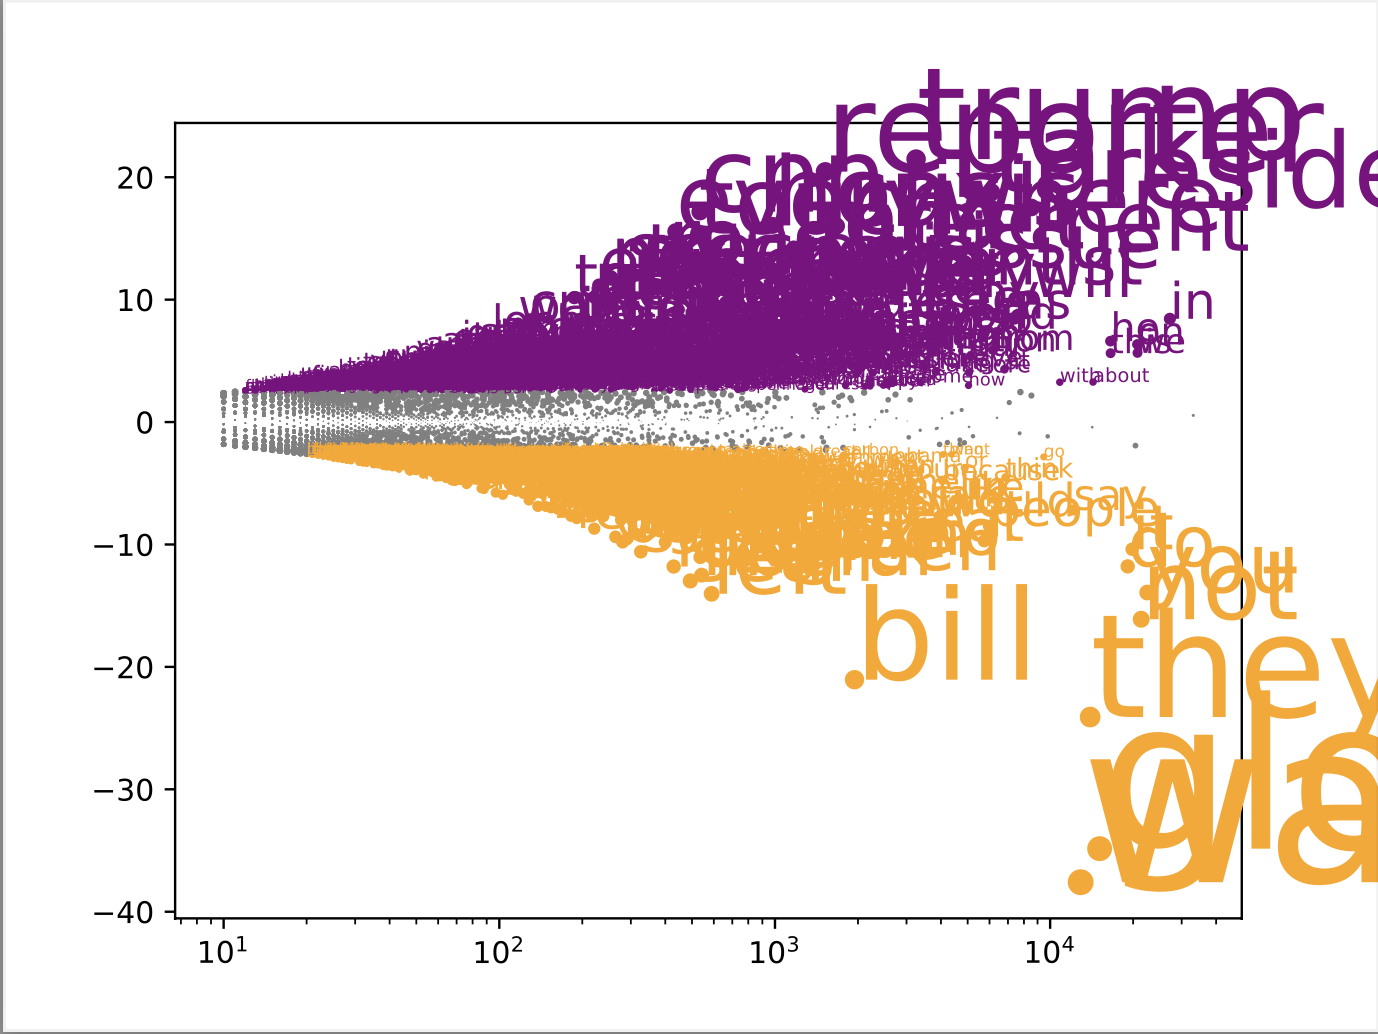

Below is the code directly copied from the above GitHub to be edited.
Edits include:
*   Adding labels to the axis
*   Changing the colors
*   Decreasing the size of the word labels
*   Save the figure as png



In [ ]:
#!/usr/bin/env python
# Adapted from https://github.com/jmhessel/FightingWords
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as CV
import string

exclude = set(string.punctuation)


def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''
    return_string = ''.join([ch for ch in in_string if ord(ch) < 128 and ch not in exclude]).lower()
    return_string = ' '.join(return_string.split())
    return return_string

def bayes_compare_language(l1, l2, ngram=1, prior=.01, cv=None, sig_val=2.573):
    '''
    Arguments:
    - l1, l2; a list of strings from each language sample
    - ngram; an int describing up to what n gram you want to consider (1 is unigrams,
    2 is bigrams + unigrams, etc). Ignored if a custom CountVectorizer is passed.
    - prior; either a float describing a uniform prior, or a vector describing a prior
    over vocabulary items. If you're using a predefined vocabulary, make sure to specify that
    when you make your CountVectorizer object.
    - cv; a sklearn.feature_extraction.text.CountVectorizer object, if desired.
    Returns:
    - A list of length |Vocab| where each entry is a (n-gram, zscore) tuple.'''
    if cv is None and type(prior) is not float:
        print("If using a non-uniform prior:")
        print("Please also pass a count vectorizer with the vocabulary parameter set.")
        quit()
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error = 'ignore', min_df = 10, max_df = .5, ngram_range=(1,ngram),
                binary = False,
                max_features = 15000)
    counts_mat = cv.fit_transform(l1+l2).toarray()
    # Now sum over languages...
    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    if type(prior) is float:
        priors = np.array([prior for i in range(vocab_size)])
    else:
        priors = prior
    z_scores = np.empty(priors.shape[0])
    count_matrix = np.empty([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = np.sum(counts_mat[:len(l1), :], axis = 0)
    count_matrix[1, :] = np.sum(counts_mat[len(l1):, :], axis = 0)
    a0 = np.sum(priors)
    n1 = 1.*np.sum(count_matrix[0,:])
    n2 = 1.*np.sum(count_matrix[1,:])
    print("Comparing language...")
    for i in range(vocab_size):
        #compute delta
        term1 = np.log((count_matrix[0,i] + priors[i])/(n1 + a0 - count_matrix[0,i] - priors[i]))
        term2 = np.log((count_matrix[1,i] + priors[i])/(n2 + a0 - count_matrix[1,i] - priors[i]))
        delta = term1 - term2
        #compute variance on delta
        var = 1./(count_matrix[0,i] + priors[i]) + 1./(count_matrix[1,i] + priors[i])
        #store final score
        z_scores[i] = delta/np.sqrt(var)
    index_to_term = {v: k for k, v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = [(index_to_term[i], z_scores[i]) for i in sorted_indices]

    x_vals = count_matrix.sum(axis=0)
    y_vals = z_scores
    sizes = abs(z_scores) * 2
    neg_color, pos_color, insig_color = ('red', 'blue', 'grey')
    colors = []
    annots = []
    for i, y in enumerate(y_vals):
        if y > sig_val:
            colors.append(pos_color)
            annots.append(index_to_term[i])
        elif y < -sig_val:
            colors.append(neg_color)
            annots.append(index_to_term[i])
        else:
            colors.append(insig_color)
            annots.append(None)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x_vals, y_vals, c=colors, s=sizes, linewidth=0)
    for i, annot in enumerate(annots):
        if annot is not None:
            ax.annotate(annot, (x_vals[i], y_vals[i]), color=colors[i], size=12)
    ax.set_xscale('log')
    ax.set_xlabel('Word Frequency (log scale)')
    ax.set_ylabel('Z-score')
    plt.savefig("fw_distribution_plot")

To visualize the graphs refer to the report or to the saved figures after running the cells

In [ ]:
# Repeating the same steps
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"].tolist()
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"].tolist()
fw = bayes_compare_language(l1=cnn_texts, l2=fox_texts, ngram=1, prior=.01, cv=None, sig_val=2.573)

Vocab size is 5470
Comparing language...


In [ ]:
# Repeating the same steps with ngram= 2
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"].tolist()
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"].tolist()
fw = bayes_compare_language(l1=cnn_texts, l2=fox_texts, ngram=2, prior=.01, cv=None, sig_val=2.573)

Vocab size is 15000
Comparing language...


**MSNBC vs. CNN**

From this point forward the code is the same just changing betweent the stations being analyzed and the ngram

In [ ]:
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw_msnbc_cnn = fighting_words_py3.bayes_compare_language(cnn_texts, msnbc_texts)
df_scores_cnn_msnbc = pd.DataFrame(fw_msnbc_cnn, columns = ['word', 'z-score'])
df_scores_cnn_msnbc

Vocab size is 5306
Comparing language...


,word,z-score
0,republican,-13.880803
1,party,-9.695853
2,somewhere,-9.300989
3,barely,-9.089475
4,de,-9.000738
...,...,...
5301,talk,13.560715
5302,cnn,13.969937
5303,president,14.522753
5304,will,18.391695


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_words = [word for word, z_score in fw_msnbc_cnn if z_score > 0]  # Words favoring CNN
negative_words = [word for word, z_score in fw_msnbc_cnn if z_score < 0]  # Words favoring MSNBC

# Extract the top 10 words with highest z-scores for CNN
top_n = 10
top_positive_words = sorted(fw_msnbc_cnn, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for MSNBC
top_negative_words = sorted(fw_msnbc_cnn, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by CNN')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by MSNBC')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_wrds_cnn_msnbc")

In [ ]:
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"].tolist()
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"].tolist()
fw = bayes_compare_language(l1=cnn_texts, l2=msnbc_texts, ngram=1, prior=.01, cv=None, sig_val=2.573)

Vocab size is 5306
Comparing language...


In [ ]:
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw_msnbc_cnn_ngram = fighting_words_py3.bayes_compare_language(cnn_texts, msnbc_texts, ngram= 2)
df_scores_cnn_msnbc = pd.DataFrame(fw_msnbc_cnn_ngram, columns = ['word', 'z-score'])
df_scores_cnn_msnbc

Vocab size is 15000
Comparing language...


,word,z-score
0,republican,-13.869984
1,party,-9.689912
2,in america,-9.566332
3,somewhere,-9.299894
4,barely,-9.088587
...,...,...
14995,president,14.485211
14996,will,18.348418
14997,will talk,22.588777
14998,reporter,23.003633


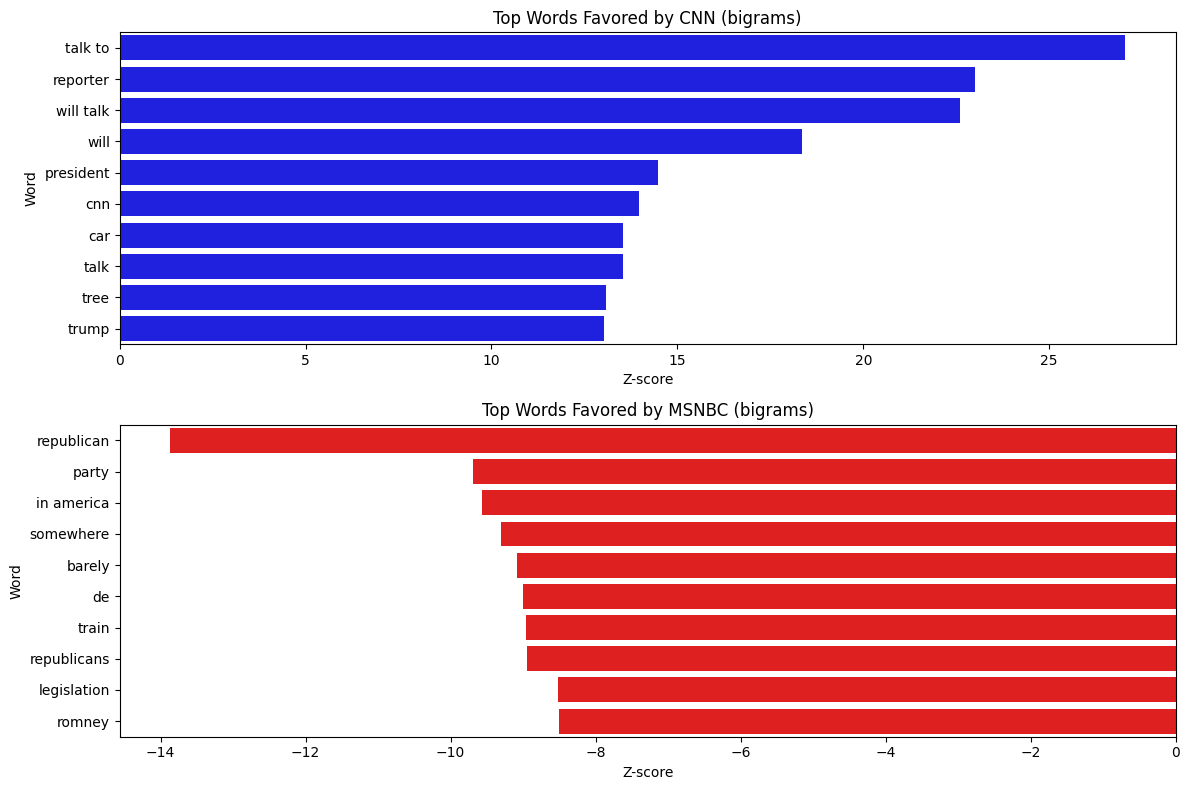

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_words = [word for word, z_score in fw_msnbc_cnn_ngram if z_score > 0]  # Words favoring CNN
negative_words = [word for word, z_score in fw_msnbc_cnn_ngram if z_score < 0]  # Words favoring MSNBC

# Extract the top 10 words with highest z-scores for CNN
top_n = 10
top_positive_words = sorted(fw_msnbc_cnn_ngram, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for MSNBC
top_negative_words = sorted(fw_msnbc_cnn_ngram, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by CNN (bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by MSNBC (bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_bigrams_msnbc_cnn")

In [ ]:
cnn_texts = cleaned_df.loc[cleaned_df['station'] == "CNN", "clean_snippet"].tolist()
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"].tolist()
fw = bayes_compare_language(l1=cnn_texts, l2=msnbc_texts, ngram=2, prior=.01, cv=None, sig_val=2.573)

Vocab size is 15000
Comparing language...


**MSNBC vs. Fox News**

In [ ]:
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw_msnbc_fox = fighting_words_py3.bayes_compare_language(fox_texts, msnbc_texts)
df_scores_fox_msnbc = pd.DataFrame(fw_msnbc_fox, columns = ['word', 'z-score'])
df_scores_fox_msnbc

Vocab size is 5879
Comparing language...


,word,z-score
0,republican,-20.640330
1,ve,-15.492787
2,in,-13.306055
3,deny,-13.149531
4,issue,-13.143790
...,...,...
5874,green,16.243516
5875,bill,16.974159
5876,they,21.824496
5877,warming,46.089288


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_words = [word for word, z_score in fw_msnbc_fox if z_score > 0]  # Words favoring Fox News
negative_words = [word for word, z_score in fw_msnbc_fox if z_score < 0]  # Words favoring MSNBC

# Extract the top 10 words with highest z-scores for Fox News
top_n = 10
top_positive_words = sorted(fw_msnbc_fox, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for MSNBC
top_negative_words = sorted(fw_msnbc_fox, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by Fox News')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by MSNBC')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_wrds_msnbc_fox")

In [ ]:
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw = bayes_compare_language(l1=fox_texts, l2=msnbc_texts, ngram=1, prior=.01, cv=None, sig_val=2.573)

Vocab size is 5879
Comparing language...


In [ ]:
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw_msnbc_fox_ngram = fighting_words_py3.bayes_compare_language(fox_texts, msnbc_texts, ngram= 2)
df_scores_fox_msnbc = pd.DataFrame(fw_msnbc_fox_ngram, columns = ['word', 'z-score'])
df_scores_fox_msnbc

Vocab size is 15000
Comparing language...


,word,z-score
0,republican,-20.097243
1,of climate,-18.508651
2,ve,-14.839555
3,change and,-14.753643
4,the republican,-12.793634
...,...,...
14995,bill,17.616185
14996,they,23.521221
14997,warming,47.461885
14998,global warming,47.481890


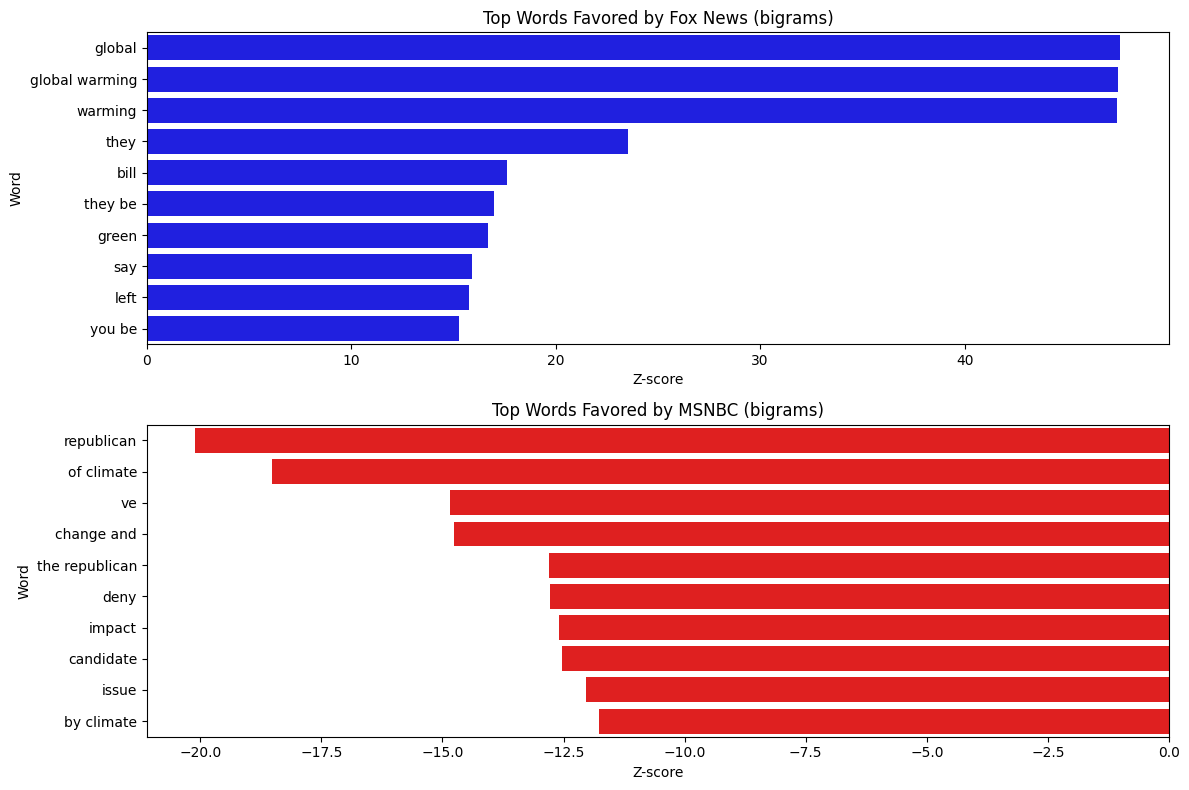

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_words = [word for word, z_score in fw_msnbc_fox_ngram if z_score > 0]  # Words favoring Fox news
negative_words = [word for word, z_score in fw_msnbc_fox_ngram if z_score < 0]  # Words favoring MSNBC

# Extract the top 10 words with highest z-scores for Fox News
top_n = 10
top_positive_words = sorted(fw_msnbc_fox_ngram, key=lambda x: x[1], reverse=True)[:top_n]
top_positive_words, top_positive_z_scores = zip(*top_positive_words)

# Extract the top 10 words with lowest z-scores for MSNBC
top_negative_words = sorted(fw_msnbc_fox_ngram, key=lambda x: x[1])[:top_n]
top_negative_words, top_negative_z_scores = zip(*top_negative_words)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=top_positive_z_scores, y=top_positive_words, color='blue')
plt.title('Top Words Favored by Fox News (bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.subplot(2, 1, 2)
sns.barplot(x=top_negative_z_scores, y=top_negative_words, color='red')
plt.title('Top Words Favored by MSNBC (bigrams)')
plt.xlabel('Z-score')
plt.ylabel('Word')

plt.tight_layout()
plt.savefig("top_bigrams_msnbc_fox")

In [ ]:
fox_texts = cleaned_df.loc[cleaned_df['station'] == "FOXNEWS", "clean_snippet"]
msnbc_texts = cleaned_df.loc[cleaned_df['station'] == "MSNBC", "clean_snippet"]
fw = bayes_compare_language(l1=fox_texts, l2=msnbc_texts, ngram=2, prior=.01, cv=None, sig_val=2.573)

Vocab size is 15000
Comparing language...


# Model Performance

## Statistical Analysis

### TF-IDF

As an evaluation method, I decided to compare it to the traditionally used method, TF-IDF.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column using TfidfVectorizer
X = vectorizer.fit_transform(cleaned_df['clean_snippet'])

# Convert the transformed data into a DataFrame (optional)
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df

,aa,aaction,aaend,aagenda,aager,aagree,aagreement,aah,aakin,aal,...,ñx,ñy,ñç,ñçrño,ññ,óqoqú,úiviiiiiiliiiii,úwp,úçozo,úñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As the previous table is difficult to interpret, I created bar graphs with the highest scored words per station.

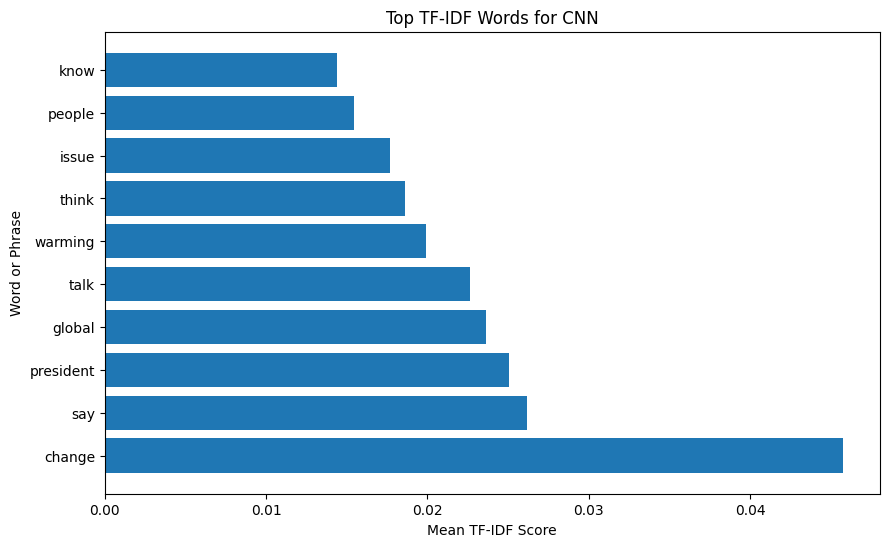

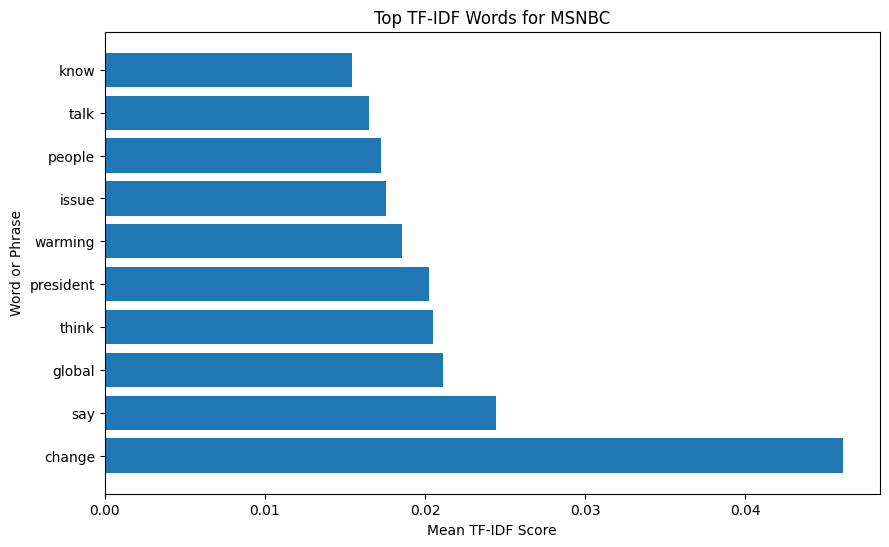

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize an empty dictionary to store TF-IDF DataFrames for each station
station_tfidf_dfs = {}

# Iterate over unique station names
for station in cleaned_df['station'].unique():
    # Filter the DataFrame for snippets belonging to the current station
    station_df = cleaned_df[cleaned_df['station'] == station]

    # Initialize TfidfVectorizer for this station
    # Although Monroe etal dont recommend removing stopwords, it is needed for this scenario
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

    # Fit and transform the clean_snippet column using TfidfVectorizer
    X = vectorizer.fit_transform(station_df['clean_snippet'])

    # Convert the transformed data into a DataFrame
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Store the TF-IDF DataFrame for the current station in the dictionary
    station_tfidf_dfs[station] = tfidf_df

    # Visualize TF-IDF scores for the current station
    plt.figure(figsize=(10, 6))
    top_words = tfidf_df.mean().nlargest(10).index  # Get top 10 words with highest mean TF-IDF scores
    scores = tfidf_df.mean().nlargest(10).values    # Get their corresponding scores
    plt.barh(top_words, scores)
    plt.title(f"Top TF-IDF Words for {station}")
    plt.xlabel("Mean TF-IDF Score")
    plt.ylabel("Word or Phrase")
    plt.show()


**Modified TF-IDF**

Based on another article the author suggests that:

"The informed Dirichlet model for feature selection introduced by Monroe et al. (2008) is an effective but poorly understood method for finding terms that distinguish between two sets of documents. In this document, I re-derive the entire model, and explore its functionality in much greater depth than Monroe et al. do in their original paper. I find that the performance of competing methods such as PMI and TF-IDF based ranking is much more similar to that of the informed Dirichlet model than the authors of the original paper would have us believe, but that the informed Dirichlet model seems to offer performance that is at least as good as these methods in most applications, and significantly better in some settings." (Denny, 2016)

He suggests taking the average of the term frequency over all documents associated with topic k and group i and then multiply this by the normal inverse document frequency term to get our TF-IDF scores. Thus, in the code below I attempted to follow this modified TF-IDF method.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate average term frequency
def calculate_average_tf(cleaned_df):
    avg_tf = cleaned_df.sum() / len(cleaned_df)
    return avg_tf

# Calculate TF-IDF scores
def calculate_tfidf(df):
    # Initialize vectorizer
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

    # Fit and transform the 'snippet' column using TfidfVectorizer
    X = vectorizer.fit_transform(cleaned_df['clean_snippet'])

    # Convert the transformed data into a DataFrame
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Calculate average term frequency
    avg_tf = calculate_average_tf(tfidf_df)

    # Calculate inverse document frequency
    idf = np.log(len(cleaned_df) / (1 + (tfidf_df > 0).sum(axis=0)))

    # Calculate TF-IDF scores
    tfidf_scores = avg_tf * idf

    # Get top TF-IDF values and corresponding words
    top_tfidf = tfidf_scores.nlargest(10).reset_index()
    top_tfidf.columns = ['Word or Phrase', 'TF-IDF Score']
    top_tfidf['Station'] = df['station'].iloc[0]  # Add station name

    return top_tfidf

# Group by 'station' and calculate TF-IDF scores
grouped_df = cleaned_df.groupby(['station'])
tfidf_results = grouped_df.apply(calculate_tfidf)

tfidf_results

Word or Phrase  TF-IDF Score  Station
station                                        
CNN     0            say      0.040327      CNN
        1          think      0.039281      CNN
        2      president      0.038908      CNN
        3           talk      0.038744      CNN
        4          issue      0.036318      CNN
        5         global      0.036014      CNN
        6        warming      0.035931      CNN
        7         people      0.035824      CNN
        8           know      0.034565      CNN
        9        believe      0.033683      CNN
FOXNEWS 0            say      0.040327  FOXNEWS
        1          think      0.039281  FOXNEWS
        2      president      0.038908  FOXNEWS
        3           talk      0.038744  FOXNEWS
        4          issue      0.036318  FOXNEWS
        5         global      0.036014  FOXNEWS
        6        warming      0.035931  FOXNEWS
        7         people      0.035824  FOXNEWS
        8           know      0.034565  FOXNEWS
        9        believe      0.033683  FOXNEWS
MSNBC   0            say      0.040327    MSNBC
        1          think      0.039281    MSNBC
        2      president      0.038908    MSNBC
        3           talk      0.038744    MSNBC
        4          issue      0.036318    MSNBC
        5         global      0.036014    MSNBC
        6        warming      0.035931    MSNBC
        7         people      0.035824    MSNBC
        8           know      0.034565    MSNBC
        9        believe      0.033683    MSNBC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualize the top highest scoring tf-idf words from the table above in bar graphs per station


# Initialize an empty dictionary to store TF-IDF DataFrames for each station
station_tfidf_dfs = {}

# Iterate over unique station names
for station in cleaned_df['station'].unique():
    # Filter the DataFrame for snippets belonging to the current station
    station_df = cleaned_df[cleaned_df['station'] == station]

    # Initialize TfidfVectorizer for this station
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

    # Fit and transform the 'clean_snippet' column using TfidfVectorizer
    X = vectorizer.fit_transform(station_df['clean_snippet'])

    # Convert the transformed data into a DataFrame
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Store the TF-IDF DataFrame for the current station in the dictionary
    station_tfidf_dfs[station] = tfidf_df

    # Visualize TF-IDF scores for the current station
    plt.figure(figsize=(10, 6))
    top_words = tfidf_df.mean().nlargest(10).index  # Get top 10 words with highest mean TF-IDF scores
    scores = tfidf_df.mean().nlargest(10).values    # Get their corresponding scores
    plt.barh(top_words, scores)
    plt.title(f"Top TF-IDF Words for {station}")
    plt.xlabel("Mean TF-IDF Score")
    plt.ylabel("Word or Phrase")
    plt.savefig(f"tf-idf_plot_{station}.png")
    plt.close()  # Close the plot to release memory and so the following plots can be saved
